<a href="https://colab.research.google.com/github/yneha70/IIIT-AIML_Project_and_labs/blob/main/Module_2_Lab_2_Tutorial_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [3]:
breast_data = load_breast_cancer().data
print("Features:", breast_data.shape)  ### 569 rows and 30 columns expected

breast_labels = np.reshape(load_breast_cancer().target, (569,1))
print("Target:", breast_labels.shape) ### 569 rows and 1 target column expected

Features: (569, 30)
Target: (569, 1)


In [4]:
final_breast_data = np.concatenate([breast_data, breast_labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)

features = load_breast_cancer().feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
X = breast_dataset.iloc[:,:30].values
y = breast_dataset.iloc[:,30].values

print(np.shape(X), np.shape(y))

(569, 30) (569,)


In [6]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

print(np.std(X_std))

1.0


In [7]:
X_std_df = pd.DataFrame(X_std)
X_std_df.columns = features
X_std_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [8]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = 1/ (X_std.shape[0]-1) * (X_std - mean_vec).T.dot(X_std - mean_vec)
print("Covariance matrix first 5 rows and columns:")
print(cov_mat[0:5, 0:5])

Covariance matrix first 5 rows and columns:
[[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056]]


In [9]:
cov_mat.shape

(30, 30)

In [10]:
cov_mat_numpy = np.cov(X_std.T)

print("Covariance matrix first 5 rows and columns:")
print(cov_mat_numpy[0:5, 0:5])

Covariance matrix first 5 rows and columns:
[[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056]]


In [11]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [12]:
eig_vals.shape, eig_vecs.shape

((30,), (30, 30))

Explained variance:
[np.float64(44.272025607526366), np.float64(18.971182044033082), np.float64(9.39316325743138), np.float64(6.602134915470145), np.float64(5.495768492346261), np.float64(4.024522039883353), np.float64(2.250733712982508), np.float64(1.5887238000213286), np.float64(1.3896493745591103), np.float64(1.1689781894131492), np.float64(0.9797189875980148), np.float64(0.8705379007378842), np.float64(0.8045249871967315), np.float64(0.5233657454926355), np.float64(0.3137832167627404), np.float64(0.2662093365152308), np.float64(0.19799679253242747), np.float64(0.17539594502263714), np.float64(0.16492530592251567), np.float64(0.10386467483387118), np.float64(0.09990964637002543), np.float64(0.09146467510543434), np.float64(0.08113612588991073), np.float64(0.06018335666716669), np.float64(0.05160423791651963), np.float64(0.02725879954774821), np.float64(0.023001546250595566), np.float64(0.005297792903809051), np.float64(0.002496010324689434), np.float64(0.00044348274273595367)]
Cumul

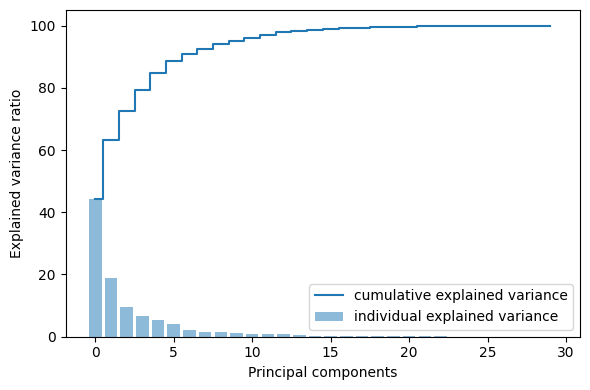

In [13]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("Explained variance:")
print(var_exp)
cum_var_exp = np.cumsum(var_exp)
print("Cumulative explained variance:")
print(cum_var_exp)
plt.figure(figsize=(6 , 4))
plt.bar(range(30), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(30), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [14]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1),
                      eig_pairs[1][1].reshape(30,1),
                      eig_pairs[2][1].reshape(30,1)))
Y = X_std.dot(matrix_w)
print(Y)

[[ 9.19283683  1.94858307 -1.12316616]
 [ 2.3878018  -3.76817174 -0.52929269]
 [ 5.73389628 -1.0751738  -0.55174759]
 ...
 [ 1.25617928 -1.90229671  0.56273053]
 [10.37479406  1.67201011 -1.87702933]
 [-5.4752433  -0.67063679  1.49044308]]


In [15]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)

print(Y_sklearn)

[[ 9.19283683  1.94858307 -1.12316616]
 [ 2.3878018  -3.76817174 -0.52929269]
 [ 5.73389628 -1.0751738  -0.55174759]
 ...
 [ 1.25617928 -1.90229671  0.56273053]
 [10.37479406  1.67201011 -1.87702933]
 [-5.4752433  -0.67063679  1.49044308]]


In [16]:
final_df = pd.DataFrame(columns=["PC1", "PC2", "PC3", "Label"])
for i in range(len(Y)):

    dicti = dict()
    dicti["PC1"] = Y[i, 0]
    dicti["PC2"] = Y[i, 1]
    dicti["PC3"] = Y[i, 2]
    if (int(breast_labels[i][0]) == 0):
      dicti["Label"] = "Benign"
    else:
      dicti["Label"] = "Malignant"
    final_df = pd.concat([final_df, pd.DataFrame([dicti])], ignore_index=True)
final_df.head()

/tmp/ipython-input-16-2098991849.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, pd.DataFrame([dicti])], ignore_index=True)


,PC1,PC2,PC3,Label
0,9.192837,1.948583,-1.123166,Benign
1,2.387802,-3.768172,-0.529293,Benign
2,5.733896,-1.075174,-0.551748,Benign
3,7.122953,10.275589,-3.232790,Benign
4,3.935302,-1.948072,1.389767,Benign


In [17]:
import plotly.graph_objects as go
import plotly.express as px

In [18]:
for_x = final_df.PC1.tolist()
for_y = final_df.PC2.tolist()
for_label = final_df.Label.tolist()
for_hover = final_df.Label.tolist()
fig = px.scatter(x=for_x, y=for_y, color=for_label,
                 title="Principal Component Axis",
                 color_discrete_map={"Benign": "aqua", "Malignant": "yellow"})
fig.update_layout(
    xaxis=dict(title = 'PC1', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    yaxis=dict(title = 'PC2', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    plot_bgcolor='#555555',
    font=dict(
        family="Times New Roman",
        size=16,
        color="Black"))
fig.update_traces(marker=dict(size=8,))
fig.show(renderer = "colab")

In [19]:
fig = px.scatter_3d(final_df, x='PC1', y='PC2', z='PC3', color='Label', title="Principal Component Axis")
fig.update_traces(marker=dict(size=6,))

fig.show(renderer = "colab")